In [16]:
#Ridge Regression 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams.update({"font.size"  : 12})


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge                           


boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
#print(boston_df.info())

"""add another column which contain the house price which in scikit learn
datasets are considered as  target"""

boston_df['Price'] =boston.target

#print(boston_df.head(3))

newX = boston_df.drop("Price", axis = 1)
print(newX[0:3])  #Check0$')                           
newY = boston_df["Price"]

print(type(newY))   #Pandas core frame
X_train, X_test, Y_train, Y_test =train_test_split(newX,newY, test_size = 0.3
                                                 , random_state =3)
print(len(X_test),len(Y_test))
lr = LinearRegression()
lr.fit(X_train, Y_train)


#rr = Ridge(alpha= 0.01) 
#higher the alpha value more restriction on the coefficints;low alpha>more
#eneralization coefficint are barely restricted and in this case linear and
#idge regression reassemble

rr.fit(X_train, Y_train)

rr100 = Ridge(alpha = 100)  #comparison with alpha value
rr100.fit(X_train, Y_train)

train_score = lr.score(X_train, Y_train)
test_score = lr.score(X_test, Y_test)

Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)


Ridge_train_score100 = rr100.score(X_train, Y_train)
Ridge_test_score100 = rr100.score(X_test,Y_test)



print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("linear regression train score with low alpha:", Ridge_train_score)
print("linear regression test score with low alpha:", Ridge_test_score) 
print("linear regression train score with high alpha:", Ridge_train_score100) 
print("linear regression test score with high alpha:", Ridge_test_score100)
   
plt.plot(rr100.coef_, alpha =0.7, linestyle ="none", marker = '*',markersize = 5
         , color = 'red', label = r'Ridge; $\alpha = 0.01$', zorder =7) #zorder is for ordering the marker

plt.plot(rr100.coef_,alpha=0.5,linestyle= 'none', marker = 'd',markersize = 6
         , color = 'blue', label = r'Ridge; $\alpha =100$')  #a;pha here is for transparency

 
plt.plot(lr.coef_,alpha = 0.4, linestyle= 'none', marker = 'o', markersize = 7,
        color ='green', label ="Linear Regression")


plt.xlabel("Coefficient index", fontsize=16)
plt.ylabel("Coefficient magntude", fontsize = 16)
plt.legend(fontsize = 13, loc = 4)
plt.show()  

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


training_score: 0.5600974529893081
test score: 0.5832244618818156
number of feature used: 4
training score for alpha =0.01:  0.7037865778498827
test score for alpha = 0.01:  0.6641831577726228
number of feature used for alpha 0.01:  10
training score for alpha = 0.0001: 0.7754092006936699
test score for alpha = 0.0001:  0.7318608210757904
number of feature used for alpha = 0.0001:  22
LR training score: 0.7842206194055071
LR test score: 0.7329325010888945


/home/aloisstar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


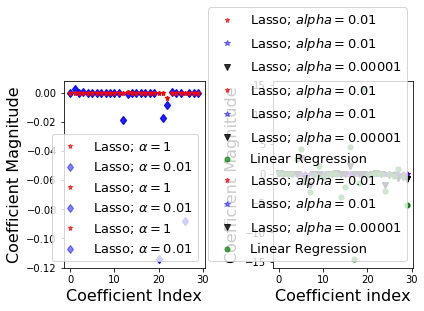

In [11]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#difference betweem lasso and ridge is that some of the coefficient can be zero and i.e some of the featurte are completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split

cancer = load_breast_cancer()
#print cancer.keys()

cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
#print cancer_df.head(3)

X = cancer.data
Y = cancer.target


X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size =0.3, random_state = 31)
lasso = Lasso()
lasso.fit(X_train,Y_train)
train_score = lasso.score(X_train, Y_train)
test_score = lasso.score(X_test, Y_test)
coeff_used = np.sum(lasso.coef_ != 0)

print("training_score:", train_score)
print("test score:", test_score)
print("number of feature used:", coeff_used)

lasso001 = Lasso(alpha = 0.01,max_iter = 10e5)
lasso001.fit(X_train,Y_train)


train_score001 = lasso001.score(X_train,Y_train)
test_score001 = lasso001.score(X_test,Y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha =0.01: ", train_score001)
print("test score for alpha = 0.01: ", test_score001)
print("number of feature used for alpha 0.01: ", coeff_used001)


lasso00001 = Lasso(alpha = 0.0001, max_iter = 10e5)
lasso00001.fit(X_train, Y_train)


train_score00001 = lasso00001.score(X_train,Y_train)
test_score00001 = lasso00001.score(X_test,Y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha = 0.0001:", train_score00001)
print("test score for alpha = 0.0001: ", test_score00001)
print("number of feature used for alpha = 0.0001: ", coeff_used00001)


lr1 = LinearRegression()
lr1.fit(X_train, Y_train)
lr1_train_score = lr1.score(X_train,Y_train)
lr1_test_score = lr1.score(X_test, Y_test)

print("LR training score:", lr1_train_score)
print("LR test score:", lr1_test_score)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha = 0.7, linestyle = 'none', marker = '*',markersize = 5,
        color = 'red', label = r'Lasso; $\alpha = 1$', zorder = 7) # alpha here is for transparency
plt.plot(lasso001.coef_, alpha = 0.5, linestyle = 'none', marker = 'd', markersize = 6, color = 'blue', label = r'Lasso; $\alpha = 0.01$')#alha here is for transparecy


plt.xlabel("Coefficient Index", fontsize = 16)
plt.ylabel("Coefficient Magnitude", fontsize = 16)
plt.legend(fontsize = 13, loc = 4)


plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha = 0.7, linestyle = 'none', marker = '*', markersize = 5, color = 'red', label = r'Lasso; $alpha=0.01$')  #alpha here is for transparency
plt.plot(lasso001.coef_,alpha = 0.5,linestyle = 'none', marker = '*',markersize = 6, color ='blue', label = r'Lasso; $alpha = 0.01$')  #alpha here is for transparency
plt.plot(lasso00001.coef_, alpha = 0.8,linestyle = 'none', marker = 'v', markersize = 6, color ='black', label = r'Lasso; $alpha = 0.00001$')
plt.plot(lr1.coef_, alpha= 0.7, linestyle = 'none', marker = 'o', markersize = 5, color = 'green', label = 'Linear Regression', zorder = 2)


plt.xlabel("Coefficient index", fontsize = 16)
plt.ylabel("Coefficient Magnitude", fontsize = 16)
plt.legend(fontsize = 13, loc =4)
plt.tight_layout()
plt.show()
